In [10]:
from numpy.random import rand
import numpy as np
import sys,os
sys.path.append(os.pardir)
from tools.models.regressors.gaussian_process_regressor import GaussianProcessRegressor

In [11]:
def generate(N,func,window=100,center=0 ,epsilon=1):
    x = (rand(N)-0.5) * window + center
    y = func(x)  + epsilon*np.random.randn(N)
    return x,y

In [23]:
def f(x):
    return np.sin(x)/x

In [59]:
X,y=generate(N=30,func=f,window=30,epsilon=0.1)

In [69]:
import matplotlib.pyplot as plt
import numpy as np

def plot(X, Y, title,func):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(X, Y, color="blue", marker="x")
    x = np.linspace(min(X), max(X), 100)
    y =func(x) 
    ax.plot(x, y, color='black')

    plt.title(title)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()


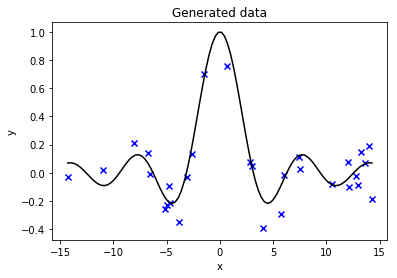

In [70]:
plot(X,y,"Generated data",f)

In [71]:
class GaussianKernel:
    def __init__(self,h):
        self.h = h
        
    def run(self,x,y):
        return np.exp(-np.linalg.norm(x-y)/self.h)

In [72]:
kernel=GaussianKernel(h=1000)
model=GaussianProcessRegressor(kernel)

In [73]:
model.fit(X,y)

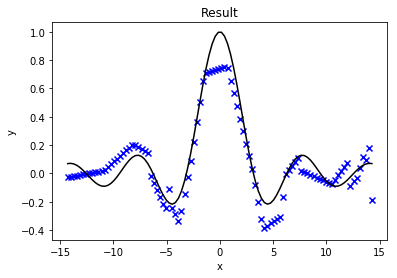

In [74]:
x = np.linspace(min(X), max(X), 100)
pred_y=model.predict(x)
plot(x,pred_y,"Result",f)

In [ ]:
plt.fill_between(x_test, y - y_std, y + y_std, color="pink", alpha=0.5, label="predict_std")